In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


In [4]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/GCM/ensemble-average/gcmensemble.nc')

data

<xarray.Dataset>
Dimensions:    (time: 1872, bnds: 2, longitude: 32, latitude: 40)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2005-12-16 12:00:00
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    pr         (time, latitude, longitude) float32 ...
Attributes: (12/29)
    CDI:                    Climate Data Interface version 1.9.9rc1 (https://...
    Conventions:            CF-1.4
    history:                Fri Jul 22 11:00:06 2022: cdo divc,3 final.nc gcm...
    source:                 MIROC5 2010 atmosphere: MIROC-AGCM6 (T85L40); oce...
    institution:            AORI (Atmosphere and Ocean Research Institute, Th...
    institute_id:           MIROC
    ...                     ...
    title:                  MIROC5 model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.5.6
    CDO:                    Climate Data Operators version 1.9.9rc1 (https://...

In [5]:
#changing time dim to datetime64[ns] dtype

datetimeindex = data.indexes['time'].to_datetimeindex()
data['time']=datetimeindex
data


/home/mkibria/miniconda3/envs/esp-sp/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]
/tmp/ipykernel_2730/3137857967.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


<xarray.Dataset>
Dimensions:    (time: 1872, bnds: 2, longitude: 32, latitude: 40)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2005-12-16T12:00:00
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1850-01-01 00:00:00 ... 2006-01-01 00:00:00
    pr         (time, latitude, longitude) float32 ...
Attributes: (12/29)
    CDI:                    Climate Data Interface version 1.9.9rc1 (https://...
    Conventions:            CF-1.4
    history:                Fri Jul 22 11:00:06 2022: cdo divc,3 final.nc gcm...
    source:                 MIROC5 2010 atmosphere: MIROC-AGCM6 (T85L40); oce...
    institution:            AORI (Atmosphere and Ocean Research Institute, Th...
    institute_id:           MIROC
    ...                     ...
    title:                  MIROC5 model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.5.6
    CDO:                    Climate Data Operators version 1.9.9rc1 (https://...

In [6]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1980-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (time: 311, bnds: 2, longitude: 32, latitude: 40)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-16T12:00:00 ... 2005-11-16
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1980-01-01 00:00:00 ... 2005-12-01 00:00:00
    pr         (time, latitude, longitude) float32 ...
Attributes: (12/29)
    CDI:                    Climate Data Interface version 1.9.9rc1 (https://...
    Conventions:            CF-1.4
    history:                Fri Jul 22 11:00:06 2022: cdo divc,3 final.nc gcm...
    source:                 MIROC5 2010 atmosphere: MIROC-AGCM6 (T85L40); oce...
    institution:            AORI (Atmosphere and Ocean Research Institute, Th...
    institute_id:           MIROC
    ...                     ...
    title:                  MIROC5 model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.5.6
    CDO:                    Climate Data Operators version 1.9.9rc1 (https://...

In [7]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (time: 104, bnds: 2, longitude: 32, latitude: 40)
Coordinates:
  * time       (time) datetime64[ns] 1980-06-16 ... 2005-09-16
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1980-06-01 00:00:00 ... 2005-10-01 00:00:00
    pr         (time, latitude, longitude) float32 ...
Attributes: (12/29)
    CDI:                    Climate Data Interface version 1.9.9rc1 (https://...
    Conventions:            CF-1.4
    history:                Fri Jul 22 11:00:06 2022: cdo divc,3 final.nc gcm...
    source:                 MIROC5 2010 atmosphere: MIROC-AGCM6 (T85L40); oce...
    institution:            AORI (Atmosphere and Ocean Research Institute, Th...
    institute_id:           MIROC
    ...                     ...
    title:                  MIROC5 model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.5.6
    CDO:                    Climate Data Operators version 1.9.9rc1 (https://...

In [6]:
#data["pr"]["x"][379:429].values
#data["pr"]["y"][237:337].values
#data["pr"]["time"].values
#jjas_data["pr"]["lat"][:].values

#jjas_data["pr"]["lon"][:].values


#data["pr"]["x"].values

#data.x

In [7]:
#data["pr"]["y"][287:337].values

In [8]:
#to select the x and y coordinates
#jjas_data = jjas_data.sel(x=slice(4125000.,5350000.),y=slice(2975000.,4200000.))
#jjas_data

In [8]:
#getting the mean for JJAS data
jjas_mean = jjas_data.pr.mean('time')
 
jjas_mean 

<xarray.DataArray 'pr' (latitude: 40, longitude: 32)>
array([[0.00011812, 0.00011792, 0.00011586, ..., 0.0001492 , 0.00015495,
        0.00015799],
       [0.00012111, 0.00012091, 0.00012025, ..., 0.00016557, 0.00014553,
        0.00014857],
       [0.00012111, 0.00012091, 0.00012025, ..., 0.00016557, 0.00014553,
        0.00014857],
       ...,
       [0.00024774, 0.00027801, 0.00028415, ..., 0.00022159, 0.00022943,
        0.0002042 ],
       [0.00024774, 0.00027801, 0.00028415, ..., 0.00022159, 0.00022943,
        0.0002042 ],
       [0.00024774, 0.00027801, 0.00028415, ..., 0.00022159, 0.00022943,
        0.0002042 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88

The pr is given in kg m $^{-2}$  s $^{-1}$ so we have to convert it into mm/day.

The formula is 1 kgm$^{-2}$ s$^{-1}$  = 86400 mm/day. 

so we have to divide pr value by 86400

 

In [9]:
pr_mm = jjas_mean*86400
pr_mm

<xarray.DataArray 'pr' (latitude: 40, longitude: 32)>
array([[10.20538935, 10.18844931, 10.01055788, ..., 12.89082603,
        13.38806357, 13.65072811],
       [10.463759  , 10.44681142, 10.38918374, ..., 14.30555382,
        12.5736041 , 12.83626989],
       [10.463759  , 10.44681142, 10.38918374, ..., 14.30555382,
        12.5736041 , 12.83626989],
       ...,
       [21.40456103, 24.01976762, 24.55015602, ..., 19.14544911,
        19.82285064, 17.64319413],
       [21.40456103, 24.01976762, 24.55015602, ..., 19.14544911,
        19.82285064, 17.64319413],
       [21.40456103, 24.01976762, 24.55015602, ..., 19.14544911,
        19.82285064, 17.64319413]])
Coordinates:
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88

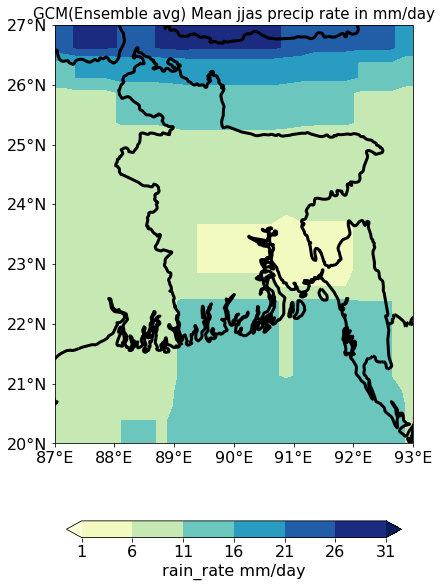

In [10]:
#plotting with cartopy jjas_pr_mean
import cartopy.feature as cfeature


plt.rcParams['font.size'] = '16'


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


 
m1 = ax.contourf(pr_mm['longitude'][:], pr_mm['latitude'][:],pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')




# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)




plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'rain_rate mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)
 

plt.title('GCM(Ensemble avg) Mean jjas precip rate in mm/day', fontsize=15)
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_gcm_ensemble-avg_jjas_mean.png")




Now I will plot the annual precipitation rate in mm/day

In [11]:
annual_mean = data.pr.mean('time')
annual_mean

<xarray.DataArray 'pr' (latitude: 40, longitude: 32)>
array([[5.57004678e-05, 5.55621882e-05, 5.54526341e-05, ...,
        6.63429018e-05, 6.65241314e-05, 6.72488532e-05],
       [5.64175134e-05, 5.62792120e-05, 5.69537006e-05, ...,
        7.27470615e-05, 6.36477198e-05, 6.43724270e-05],
       [5.64175134e-05, 5.62792120e-05, 5.69537006e-05, ...,
        7.27470615e-05, 6.36477198e-05, 6.43724270e-05],
       ...,
       [1.00262820e-04, 1.12139060e-04, 1.17280659e-04, ...,
        1.16379066e-04, 1.19087796e-04, 1.14544804e-04],
       [1.00262820e-04, 1.12139060e-04, 1.17280659e-04, ...,
        1.16379066e-04, 1.19087796e-04, 1.14544804e-04],
       [1.00262820e-04, 1.12139060e-04, 1.17280659e-04, ...,
        1.16379066e-04, 1.19087796e-04, 1.14544804e-04]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88

In [12]:
#converting from kgm-2s-2 to mm/day

annual_pr_mm = annual_mean*86400
annual_pr_mm

<xarray.DataArray 'pr' (latitude: 40, longitude: 32)>
array([[ 4.81252042,  4.80057306,  4.79110759, ...,  5.73202672,
         5.74768495,  5.81030091],
       [ 4.87447316,  4.86252392,  4.92079973, ...,  6.28534611,
         5.49916299,  5.56177769],
       [ 4.87447316,  4.86252392,  4.92079973, ...,  6.28534611,
         5.49916299,  5.56177769],
       ...,
       [ 8.66270761,  9.68881475, 10.13304892, ..., 10.05515128,
        10.28918554,  9.89667107],
       [ 8.66270761,  9.68881475, 10.13304892, ..., 10.05515128,
        10.28918554,  9.89667107],
       [ 8.66270761,  9.68881475, 10.13304892, ..., 10.05515128,
        10.28918554,  9.89667107]])
Coordinates:
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88

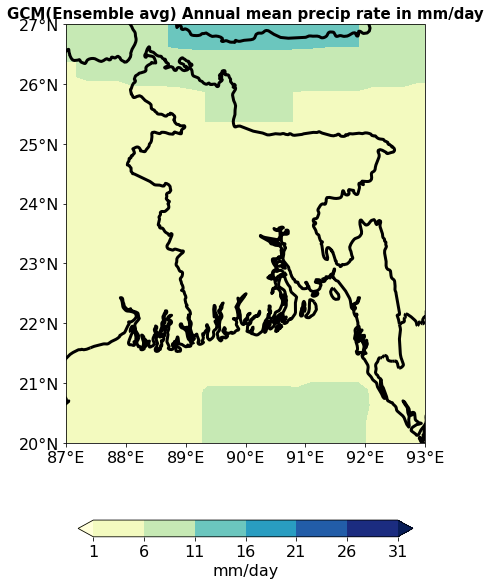

In [13]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(annual_pr_mm['longitude'], annual_pr_mm['latitude'],annual_pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)

plt.title('GCM(Ensemble avg) Annual mean precip rate in mm/day',fontweight='bold', fontsize=15)

plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_gcm_ensemble avg_annual_mean.png")




